# **Makeover Monday**

###### John Andrew Dixon

## **The Original**

[_**Original Dataset**_](https://data.world/makeovermonday/2021w36)

_**Original Data Visualization**_

![Linechart showing Abortion Support 2021](https://content.gallup.com/origin/gallupinc/GallupSpaces/Production/Cms/POLL/lxocbk8vnu-ls9p2n5ae-a.png "Abortion Support 2021")

## **The Makeover**

### **Data Loading**

In [1]:
# Import the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load the data and verify
df = pd.read_excel('../../Coding Dojo/Datasets/Abortion Support 2021.xlsx')
df.head()

,Poll Date,Legal under any %,Legal only under certain %,Illegal in all %,No opinion %
0,2021 May 3-18,0.32,0.48,0.19,0.02
1,2020 May 1-13,0.29,0.50,0.20,0.02
2,2019 May 1-12,0.25,0.53,0.21,0.02
3,2018 May 1-10,0.29,0.50,0.18,0.02
4,2017 May 3-7,0.29,0.50,0.18,0.03


### **Data Cleaning**

In [3]:
df['Poll Date'] = pd.to_datetime(df['Poll Date'].str.split('-').str[0], format='%Y %b %d')
df

,Poll Date,Legal under any %,Legal only under certain %,Illegal in all %,No opinion %
0,2021-05-03,0.32,0.48,0.19,0.02
1,2020-05-01,0.29,0.50,0.20,0.02
2,2019-05-01,0.25,0.53,0.21,0.02
3,2018-05-01,0.29,0.50,0.18,0.02
4,2017-05-03,0.29,0.50,0.18,0.03
...,...,...,...,...,...
58,1981-05-08,0.23,0.52,0.21,0.04
59,1980-07-11,0.25,0.53,0.18,0.04
60,1979-02-23,0.22,0.54,0.19,0.05
61,1977-12-09,0.22,0.55,0.19,0.04


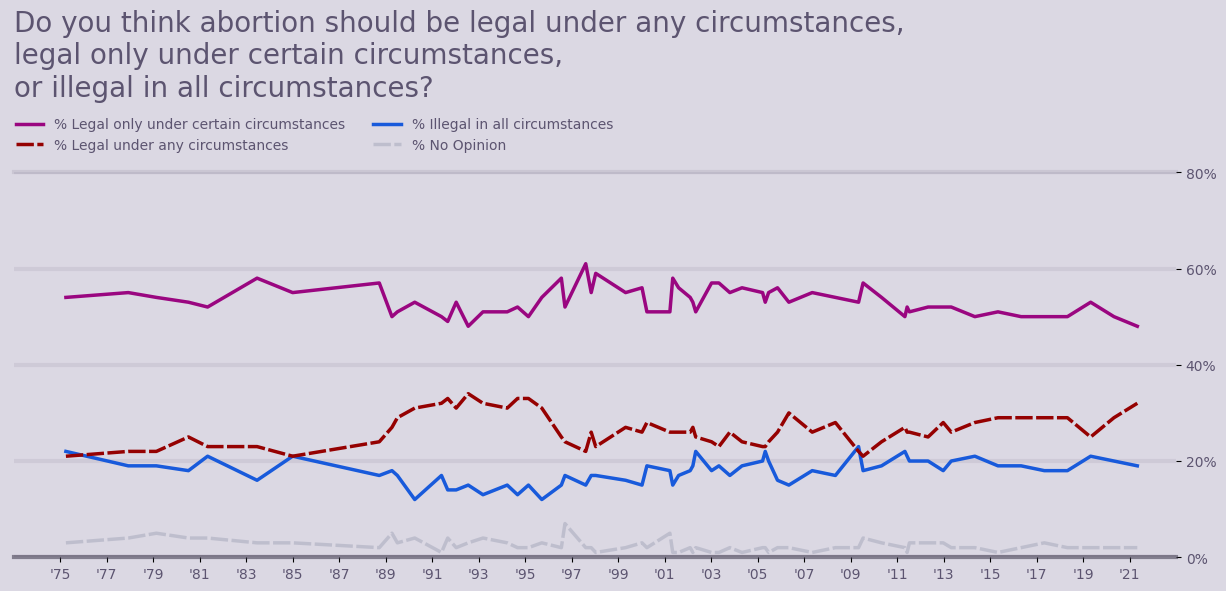

In [4]:
# Create a figure of a specific size and change its background color
plt.figure(figsize=(15, 5), 
           facecolor='#DBD8E3')


# Get the axes object
ax = plt.axes()

# Modify colors
ax.set_facecolor('#DBD8E3')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Modify the look of the top and bottom spine
ax.spines['top'].set_color('#5C547022')
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('#352F4488')
ax.spines['bottom'].set_linewidth(3)


# Add a title to the plot and format the title
plt.title('Do you think abortion should be legal under any circumstances,\nlegal only under certain circumstances,\nor illegal in all circumstances?', 
          pad=55,
          loc='left',
          x=0.0,
          color='#5C5470',
          fontsize=20)


# Create all four different plots
sns.lineplot(data=df, x='Poll Date', y='No opinion %', label='% No Opinion', color='#6B728E', linestyle=(0, (5, 1)), linewidth=2.5, alpha=0.25)
sns.lineplot(data=df, x='Poll Date', y='Illegal in all %', label='% Illegal in all circumstances', color='#185ADB', linewidth=2.5)
sns.lineplot(data=df, x='Poll Date', y='Legal under any %', label='% Legal under any circumstances', color='#950101', linestyle=(0, (5, 1)), linewidth=2.5)
sns.lineplot(data=df, x='Poll Date', y='Legal only under certain %', label='% Legal only under certain circumstances', color='#9A0680', linewidth=2.5)


# Create and format a legend
plt.legend(ncols=2,
           frameon=False,
           loc='upper left', 
           bbox_to_anchor=(-0.009, 1.175),
           labelcolor='#5C5470',
           reverse=True)


# Set y-ticks, y-tick-labels and more
plt.ylabel(None)
plt.ylim(0, 0.80)
plt.yticks(ticks=[0, 0.20, 0.40, 0.60, 0.80], 
           labels=['0%', '20%', '40%', '60%', '80%'],
           color='#5C5470')
# Make the y-axis ticks go on the right-size
plt.tick_params(axis='y', 
                right=True, 
                left=False, 
                labelright=True, 
                labelleft=False)


# Set x-ticks, x-tick-labels and more
plt.xlabel(None)
earliest = pd.Timestamp(1973, 1, 1)
latest = pd.Timestamp(2023, 1, 1)
plt.xlim(earliest, latest)
plt.xticks(ticks=[pd.Timestamp(x, 1, 1) for x in range(1975, 2022, 2)], 
           labels=[f'\'{str(x)[-2:]}' for x in range(1975, 2022, 2)],
           color='#5C5470')


plt.grid(axis='y', color='#5C5470', alpha=0.1, linewidth=3);